In [5]:
import pandas            as pd   
import numpy             as np   
import scipy             as scp  
import matplotlib.pyplot as plt 
import os as os
from datetime import date as dd 
from scipy import stats    
from scipy import optimize
import statsmodels.api as sm

In [6]:
os.getcwd()
df=pd.read_excel('Assignment 1_MF402_2024.xlsx', sheet_name= 1 )
os.getcwd()

'/Users/pengxue/Desktop/UCSD/402 Investment/Assignment 1'

In [7]:
df.head()

,Date,vwret,mkt_index,dp,10y,10y_index,3m,3m_index,cpi,cpi_index,...,manuf,energy,chems,buseq,telcm,utils,shops,health,money,other
0,01/31/1970,-0.075398,100.000000,0.037207,0.028827,100.000000,0.007158,100.000000,0.002653,100.000000,...,-7.82,-11.45,-5.44,-9.17,-2.57,-4.23,-5.88,-7.12,-9.18,-8.53
1,02/28/1970,0.059521,105.269348,0.035382,0.067886,106.788595,0.007986,100.798584,0.005291,100.562430,...,5.68,5.38,3.36,2.94,7.96,8.36,5.23,5.60,11.44,7.86
2,03/31/1970,0.002806,105.422254,0.035368,-0.000269,106.759882,0.007078,101.512027,0.005263,101.124859,...,-0.27,-0.45,-0.38,-2.59,2.29,2.91,-1.69,-5.08,-0.77,-2.91
3,04/30/1970,-0.088831,95.883322,0.038927,-0.050871,101.328913,0.005494,102.069753,0.007853,101.912261,...,-9.78,-9.17,-6.24,-14.45,-8.79,-8.05,-11.08,-10.11,-12.78,-14.51
4,05/31/1970,-0.054689,90.037638,0.041498,-0.006522,100.668015,0.006237,102.706368,0.002597,102.137233,...,-9.01,2.61,-2.97,-9.50,-3.75,-5.36,-9.45,-7.78,-8.37,-8.14


In [8]:
date = df.iloc[:,0]
returns = df.iloc[:,1]         # Nominal returns
inflation = df.iloc[:,8]       # Inflation
real_ret = returns - inflation # Real returns

# Fill in rfrate and rf10 from the dataframe
rfrate = df.iloc[:,6]          # Risk free rate
rf10 = df.iloc[:,4]      

## Question 1

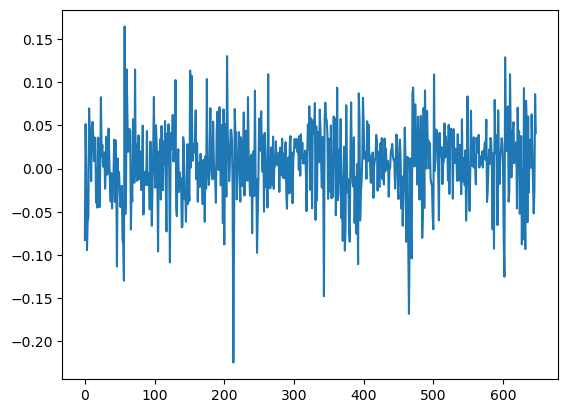

In [10]:
erp = returns - rfrate     #excess return
plt.plot(erp)

In [11]:
dim = erp.shape[0]     #sample size
cons = np.ones(dim)    #create a vector of ones
model = sm.OLS(12*erp, cons).fit()
yhat = model.predict()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 03 Oct 2024   Prob (F-statistic):                nan
Time:                        09:22:35   Log-Likelihood:                -514.31
No. Observations:                 648   AIC:                             1031.
Df Residuals:                     647   BIC:                             1035.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0673      0.021      3.200      0.0

## Question 2.1

a. Sharp ratio

In [14]:
erp = returns- rf10
vol_ret = np.std(returns)              
annualized_vol = np.sqrt(12)*vol_ret               # Compute the annnualized volatility of returns

mean_erp = np.mean(erp)
annualized_erp = 12*mean_erp

shratio = annualized_erp/annualized_vol              # Compute the Sharpe ratio
print("The annualized sharpe ratio is %.2f" % shratio)

The annualized sharpe ratio is 0.30


b. VaR

In [16]:
alpha_var = 0.03
returns_sorted = np.sort(returns)

VaR = np.quantile(returns_sorted, alpha_var)
print("The VaR is %.2f percent." % (100*VaR))

The VaR is -8.24 percent.


c. Calculating Expected Shortfall

In [18]:
alpha_es = 0.03
ES = returns_sorted[returns_sorted <= VaR].mean()       # Compute the expected shortfall
print("The Expected Shortfall is %.2f percent." % (ES*100))

The Expected Shortfall is -10.73 percent.


d. Calculating Skew

In [20]:
sk = scp.stats.skew(returns)
print("The skewness is %.2f." % sk)

The skewness is -0.42.


e. Calculating Kurtosis

In [22]:
kurt = scp.stats.kurtosis(returns)
print("The kurtosis is %.2f." % kurt)

The kurtosis is 1.58.


f. We now need to calculate Maximum Drawdown. We use the python code used in class to have a user written function.

In [24]:
def maxdrawdown(x): 
    """
    NumPy analog to corresponding MATLAB Financial Toolbox Function
    OUTPUT: start, end, and max drawdown in terms of max percentage drop from a peak
    """
    i = np.argmax(np.maximum.accumulate(x) - x) # end of period
    j = np.argmax(x[:i]) # start of the period
    percent_change = 100*( x[i] - x[j] ) / x[j]
    return j,i,percent_change

def datenum(date):
    """
    Converts yyyymmdd dates to ordinal code
    """
    dn = np.zeros(date.shape)
    for i in range(len(date)):
        dt = str(date[i])
        dn[i] = dd.toordinal(dd(int(dt[0:4]),int(dt[4:6]),int(dt[6:8])))
    return dn

In [25]:
cumulativeret = np.cumprod(1+returns)

MaxDDStartIndex, MaxDDEndIndex, MaxDD = maxdrawdown(cumulativeret)
begdate = date[MaxDDStartIndex]
enddate = date[MaxDDEndIndex]

In [27]:
print(f'The Maximum Drawdown is {MaxDD:.2f}%.')

The Maximum Drawdown is -23.67%.


In [31]:
print(f'Max VC DrawDown from date {begdate} to date {enddate}')

Max VC DrawDown from date 12/31/2021 to date 09/30/2022


g. Checking normality

(array([  1.,   2.,   5.,  32.,  84., 218., 215.,  75.,  14.,   2.]),
 array([-0.215795 , -0.1774042, -0.1390134, -0.1006226, -0.0622318,
        -0.023841 ,  0.0145498,  0.0529406,  0.0913314,  0.1297222,
         0.168113 ]),
 <BarContainer object of 10 artists>)

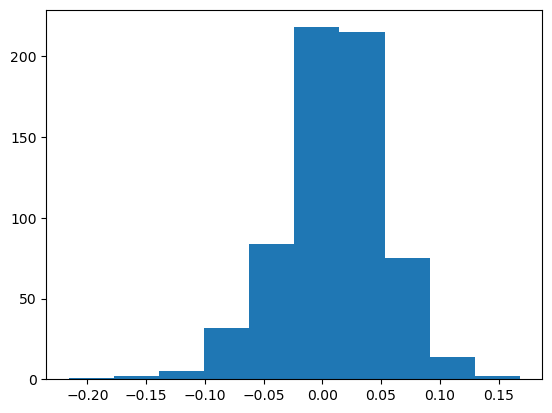

In [44]:
plt.hist(returns)

In [64]:
stats, p= stats.shapiro(returns)

alpha = 0.05
if p > 0.05:
    print("Sample looks Gaussian.")

else:
    print("Sample does not looks Gaussian.")


Sample does not looks Gaussian.


According to the histogram, 

## Question 2.2

In [50]:
def Shratio(w,mu,Sigma,Rf): 
    portfolio_return = np.sum(mu * w) - Rf    # portfolio excess return
    portfolio_vol    = np.sqrt(np.dot(w.T, np.dot(Sigma,w)))  # portfolio volatility
    return portfolio_return / portfolio_vol

Rf = rfrate[len(rfrate)-1]  # risk free rate
n = 2                      # number of assets

tbonds_ret = df.iloc[:,4]   # tbonds
tbills_ret =df.iloc[:,6]    # tbills
mean_tbonds = np.mean(tbonds_ret)  # 10年期国债的预期收益率
mean_tbills = np.mean(tbills_ret)  # 股票的预期收益率

mu = np.array([mean_tbonds, mean_tbills])
Sigma = np.cov(tbonds_ret, tbills_ret)

w0 = (np.ones((n,1))/n).flatten() #？？？

cons = ({'type' : 'eq', 'fun': lambda x: x[0] + x[1] - 1}) # portfolio weights sum to 1

# solve for tangency portfolio
sol = scp.optimize.minimize(lambda w: -Shratio(w, mu, Sigma, Rf), x0 = w0, constraints = cons) 
w_uncon = sol.x
val = -sol.fun

print(f'optimal weights are {w_uncon} with Sharpe ratio {val:.2}')

#### add risk-free asset
gamma = 5                                       # gamma: risk aversion coefficient
mu_uncon  = w_uncon.T.dot(mu)                   # mean of tangency portfolio
var_uncon = w_uncon.T.dot(Sigma).dot(w_uncon)   # variance of tangency portfolio
wT_con    = mu_uncon / (gamma * var_uncon)      # weight to be put in the tangency when maximizing mean variance utility
rcon      = wT_con*mu_uncon + (1-wT_con)*Rf

print(f'The mean of the tnagency portfolio is :{mu_uncon:.2f}')
print(f'The variance of the tangency portfolio is : {var_uncon:.2f}')
print(f'The weight on the risky portfolio is : {wT_con:.2f}')
print(f'The return of the tangency portfolio is : {rcon:.2f}')

optimal weights are [ 2033.69875063 -2032.69875063] with Sharpe ratio 0.079
The mean of the tnagency portfolio is :3.60
The variance of the tangency portfolio is : 2050.89
The weight on the risky portfolio is : 0.00
The return of the tangency portfolio is : 0.01


## Question 2.3

In [62]:
delta = tbonds_ret - returns
under=sum(delta > 0) / dim

print(f'a. Stocks underperform bonds appro {under*100:.4}% of the time.')

def CumReturnsAndDeltas(df, num_months, dim):
    
    ret =[]
    delta = []
    
    for i in range(num_months, dim):
        ret.append(np.array([(df.iloc[i,2] / df.iloc[i-num_months,2]) - 1,          # Stocks
                                 ( df.iloc[i,5] / df.iloc[i-num_months,5] ) - 1,    # Bonds
                                 ( df.iloc[i,7] / df.iloc[i-num_months,7] ) - 1,    # T-bill
                                 ( df.iloc[i,11] / df.iloc[i-num_months,11] ) - 1,  # BTC
                                 ( df.iloc[i,14] / df.iloc[i-num_months,14] ) - 1,  # Gold
                                 ( df.iloc[i,9] / df.iloc[i-num_months,9] ) - 1 ])) # Inflation
        delta.append(ret[i-num_months][1]- ret[i-num_months][0])

    ret = np.array(ret)
    delta = np.array(delta)    
    return ret, delta

ret_cumulative_1yr, delta_1yr = CumReturnsAndDeltas(df, 12, dim)
delt_1yr = sum(delta_1yr > 0) / delta_1yr.shape[0]

ret_cumulative_5yr, delta_5yr = CumReturnsAndDeltas(df, 60, dim)
delt_5yr = np.sum(delta_5yr > 0) / delta_5yr.shape[0]

ret_cumulative_10yr, delta_10yr = CumReturnsAndDeltas(df, 120, dim)
delt_10yr = np.sum(delta_10yr > 0) / delta_10yr.shape[0]

print( f'b.i At the 1 year horizon stocks underperformed bonds {delt_1yr*100:.4}% of the time.')

print(f'b.ii At the 5 year horizon stocks underperformed bonds {delt_5yr*100:.4}% of the time.')

print(f'b.iii At the 10 year horizon stocks underperformed bonds {delt_10yr*100:.4}% of the time.')

a. Stocks underperform bonds appro 43.52% of the time.
b.i At the 1 year horizon stocks underperformed bonds 41.35% of the time.
b.ii At the 5 year horizon stocks underperformed bonds 45.92% of the time.
b.iii At the 10 year horizon stocks underperformed bonds 44.89% of the time.
